In [3]:
import csv 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [4]:
org=pd.read_csv("data/cardio_train.csv",sep=";")

In [5]:
org.shape

(70000, 13)

In [6]:
org.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
org.duplicated().sum()

0

In [9]:
org.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
org.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
hear_corr = org.corr(numeric_only=True)
hear_corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


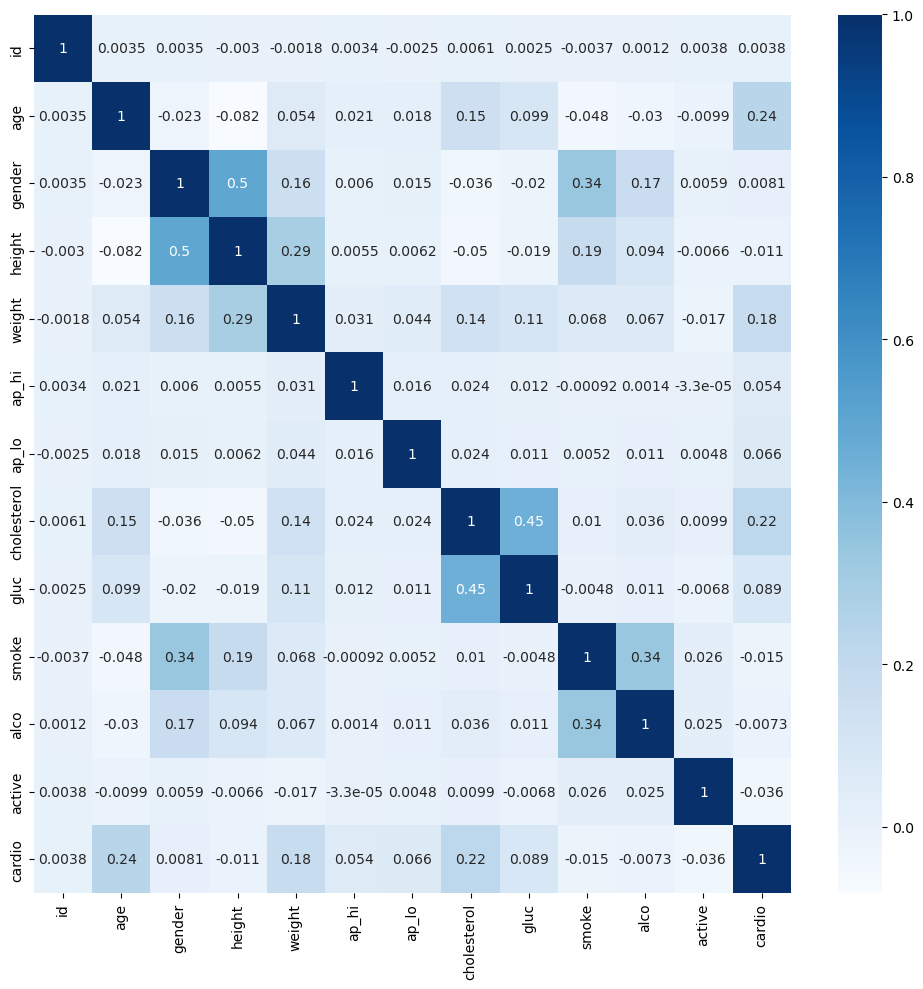

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(hear_corr, annot=True, cmap='Blues')
plt.tight_layout()

In [13]:
org['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

<Axes: xlabel='cholesterol'>

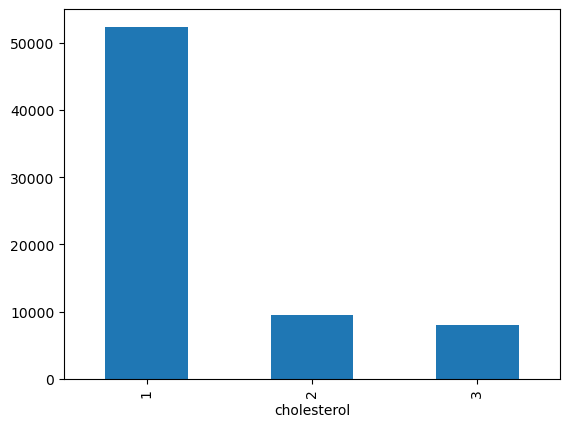

In [14]:
org['cholesterol'].value_counts().plot(kind='bar')

<Axes: xlabel='gender', ylabel='count'>

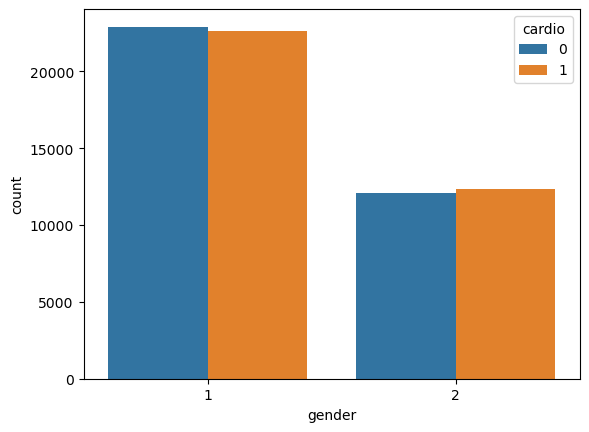

In [15]:
sns.countplot(data=org, x="gender", hue="cardio")

In [16]:
#Converting the age into round figure
org['new_age'] = (org['age']/365).round(0)

In [17]:
org['new_age']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: new_age, Length: 70000, dtype: float64

<Axes: xlabel='new_age', ylabel='count'>

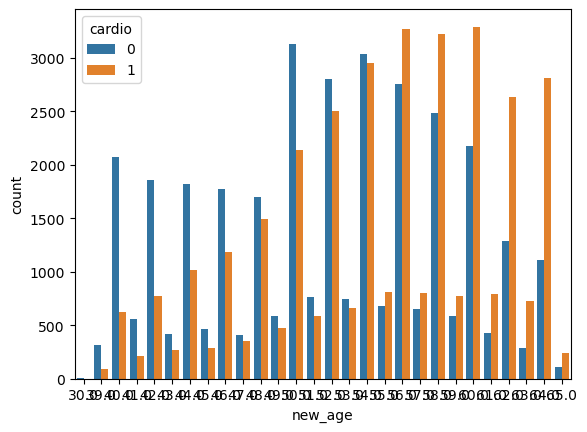

In [18]:
sns.countplot(data = org, x = org['new_age'], hue = 'cardio')

In [19]:
org.drop(['new_age'], axis = 'columns')


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


<Axes: xlabel='gluc', ylabel='count'>

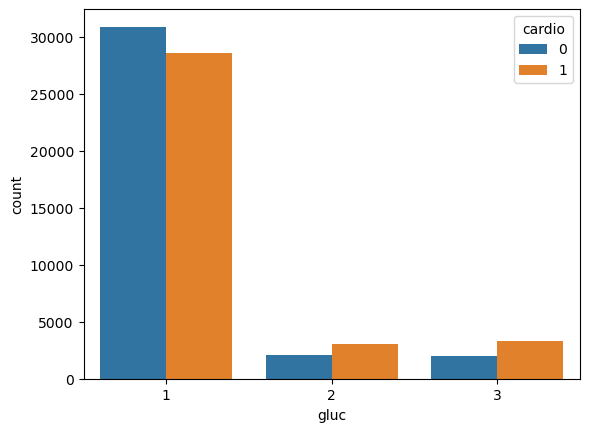

In [20]:
sns.countplot(x='gluc',hue='cardio',data=org)

In [21]:
import plotly.express as px

In [13]:
age_chol = pd.DataFrame({
    'The Cardiac disease by average' : org.groupby('cholesterol')['cardio'].mean(numeric_only=True),
    'The amount of Cholesterol' : ['Normal', 'Above Normal', 'Well Above Normal']
})
px.bar(age_chol, 'The amount of Cholesterol', 'The Cardiac disease by average',
       color='The amount of Cholesterol', title='The risk of Cardiac disease by increasing colesterol')

In [29]:
numeric_columns = org.select_dtypes(include=[int, float]).columns

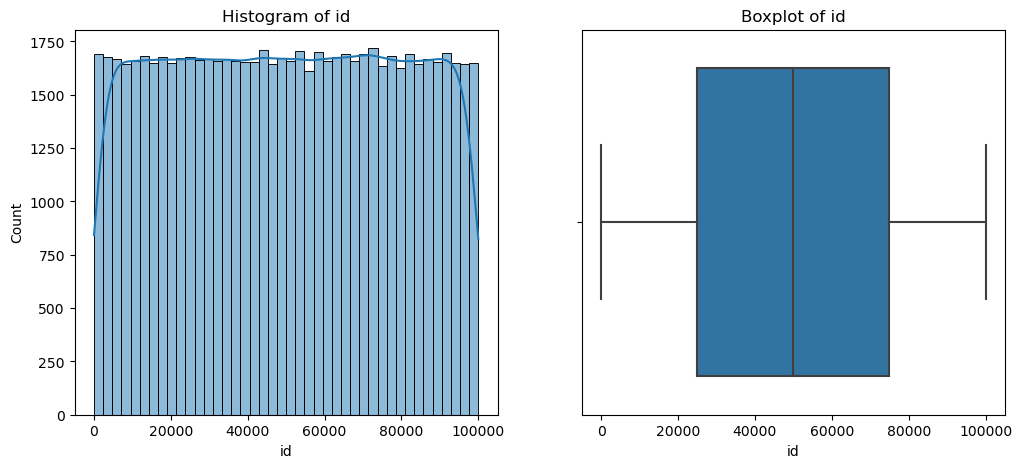

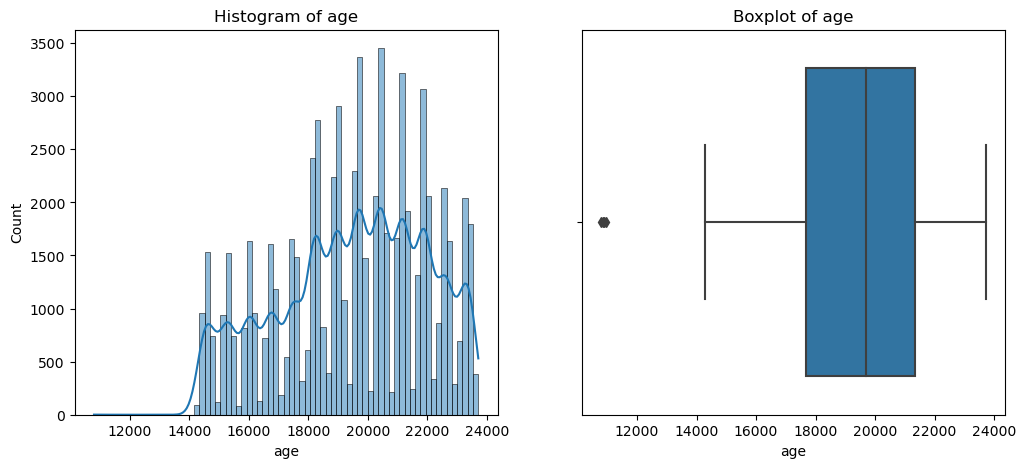

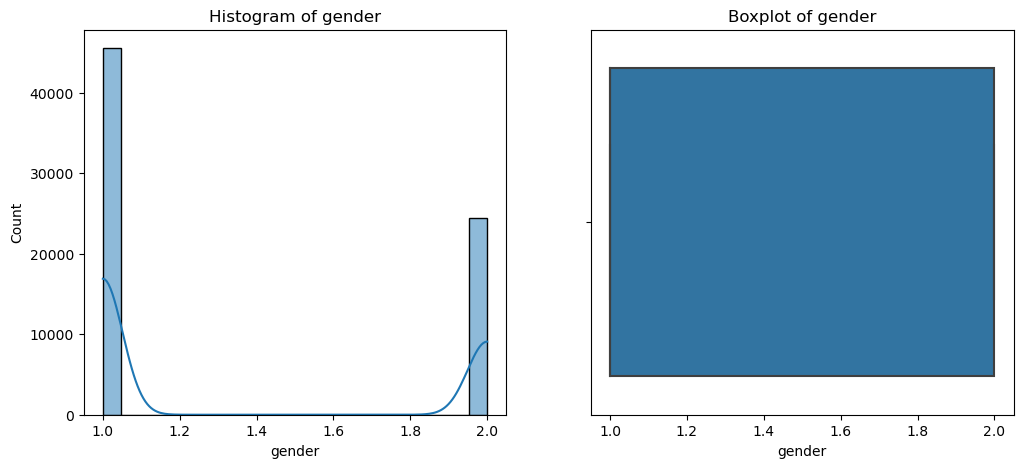

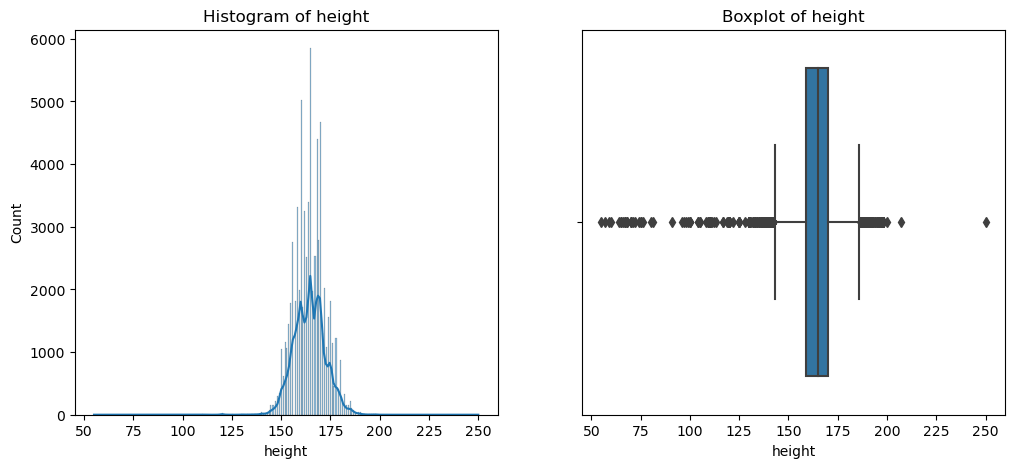

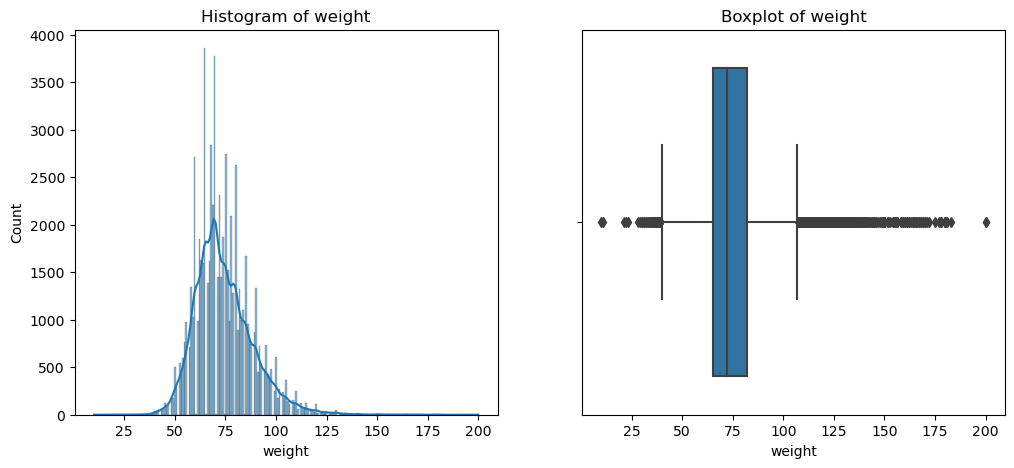

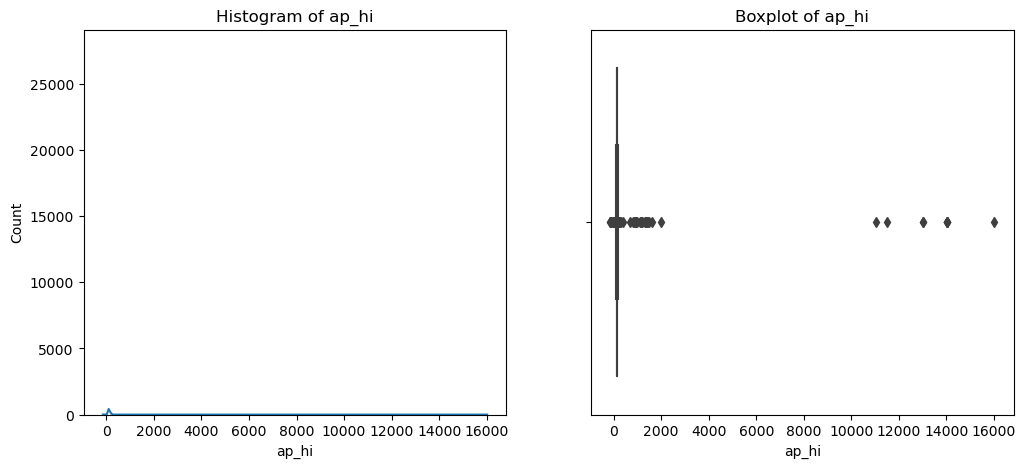

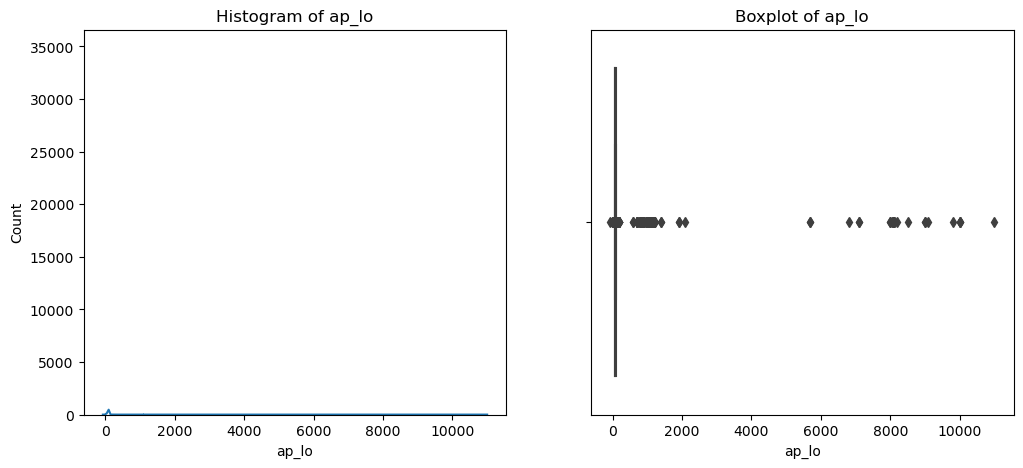

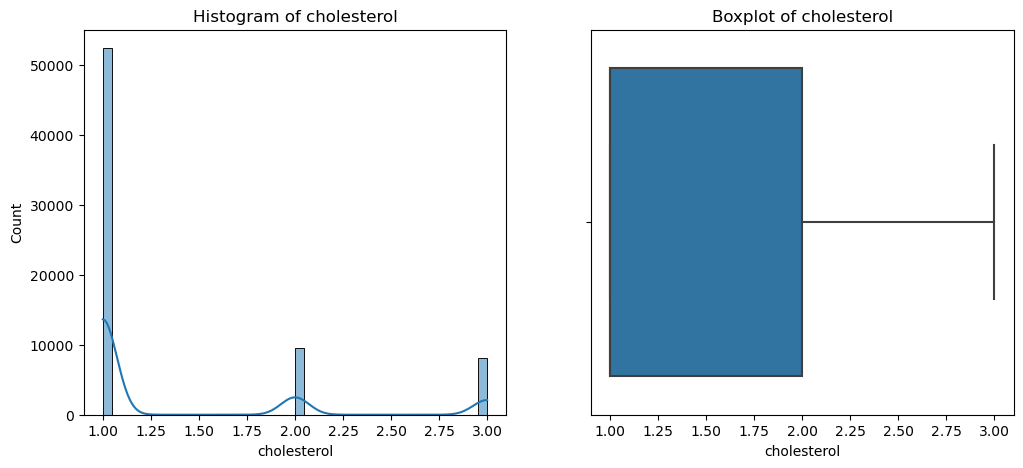

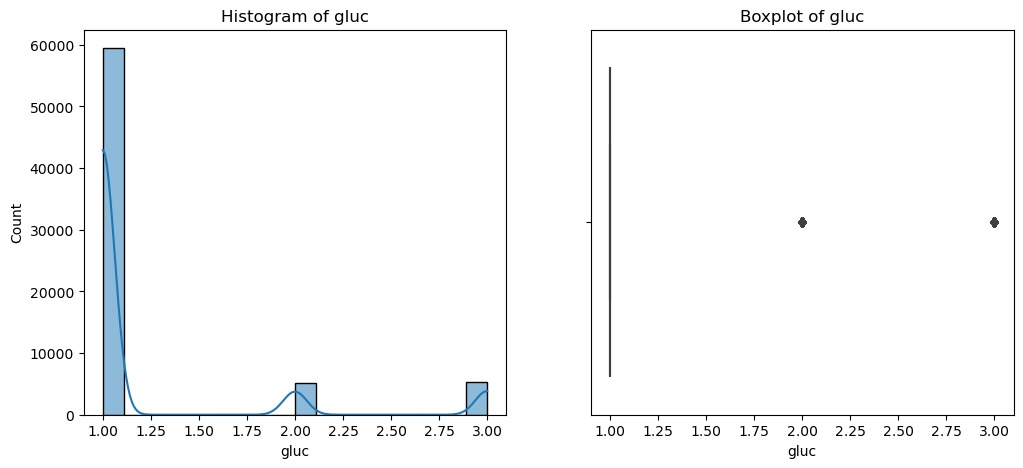

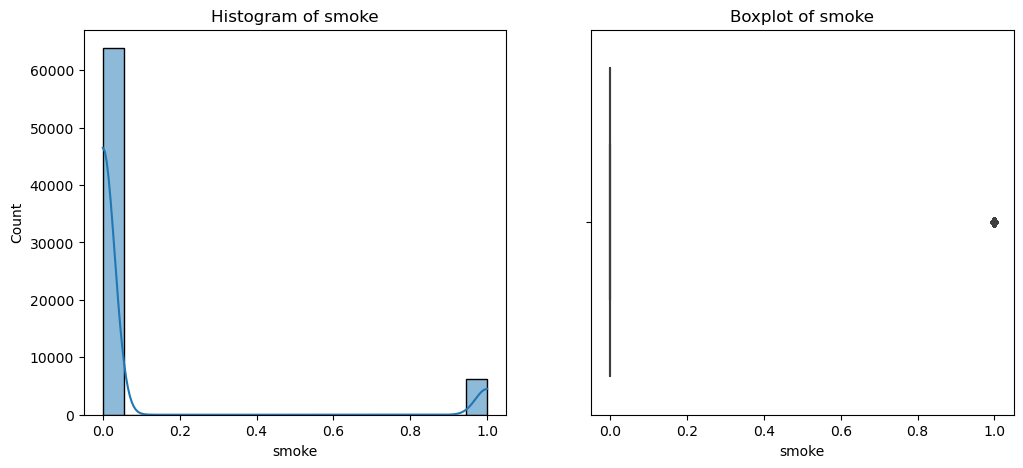

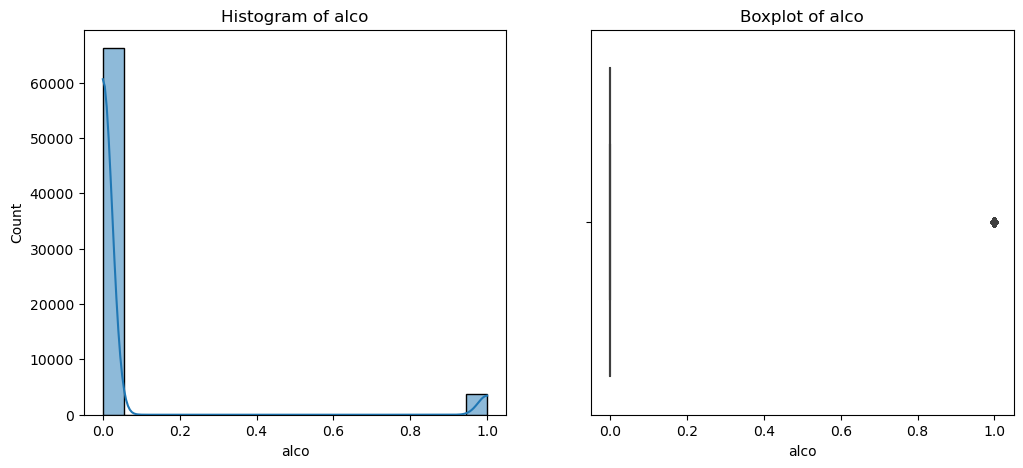

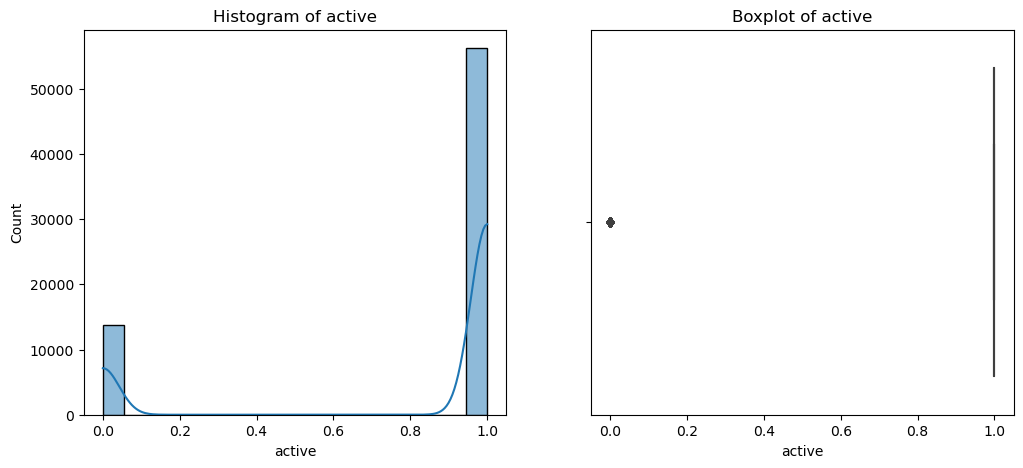

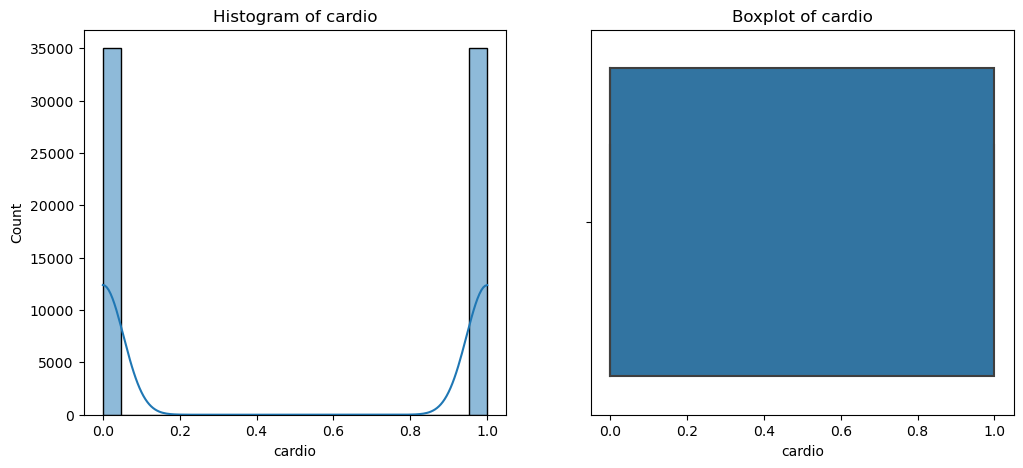

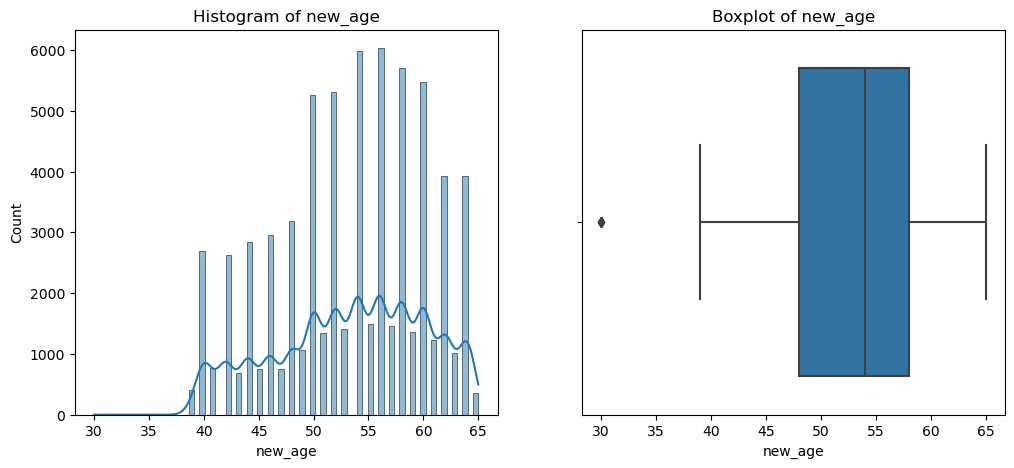

In [30]:
for col in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot histogram
    sns.histplot(org, x=col, kde=True, ax=axes[0])
    axes[0].set_title('Histogram of ' + col)

    # Plot boxplot
    sns.boxplot(x=org[col], ax=axes[1])
    axes[1].set_title('Boxplot of ' + col)

    plt.show()

In [3]:
df, dftrac = train_test_split(org, test_size=0.3, random_state=42)

# Enregistrer l'ensemble de test (20 %) dans un fichier CSV
#dftrac.to_csv('test_data.csv', index=False)

In [4]:
#df.to_csv('datatraining.csv', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49000 entries, 68681 to 15795
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49000 non-null  int64  
 1   age          49000 non-null  int64  
 2   gender       49000 non-null  int64  
 3   height       49000 non-null  int64  
 4   weight       49000 non-null  float64
 5   ap_hi        49000 non-null  int64  
 6   ap_lo        49000 non-null  int64  
 7   cholesterol  49000 non-null  int64  
 8   gluc         49000 non-null  int64  
 9   smoke        49000 non-null  int64  
 10  alco         49000 non-null  int64  
 11  active       49000 non-null  int64  
 12  cardio       49000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 5.2 MB


In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
68681,98125,20417,1,160,64.0,120,90,3,1,0,0,1,1
19961,28510,22690,2,167,65.0,120,80,3,3,0,0,0,0
11040,15795,22784,1,160,66.0,120,90,1,1,0,0,1,1
27673,39560,22648,1,163,55.0,125,90,3,1,0,0,1,1
22876,32677,21712,1,158,85.0,150,80,3,1,0,0,1,1
